In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data.csv")
df.head()

,age,work-class,work-fnl,education,education-num,marital-status,position,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## 3. Data Preparation and Exploratory Data Analysis(EDA)

<br>

- The Numbers of Rows and Columns in this data set are: **48,842** rows and **15** columns respectively.


- **For better understanding, the columns should be renamed as follows:**
    - [fnlwgt  -  final_weight], 
    - [educational-num - educational_num], 
    - [capital-gain - capital_gain], 
    - [capital-loss - capital_loss], 
    - [hours-per-week - hours_per_week] and 
    - [native-country - native_country].


- **There are missing values in the dataset, although they take diverse forms, such as:**
    - In the fourth row of workclass, we have **"?"** instead of **Nan**, and similarly in occupation.
    - Both the capital gain and loss have a mean of zero, while the maximum has a relatively large number.


- From Statistics Summary table below, it clearly shows that "hours per week" has some outliers. This also demonstrates that some people work more than others in their occupations, and we must recognise them as outliers in this case.


- Before eliminating [ occupation = "?" ], I double-checked to make sure that the majority of them have [ income = "<=50K" ]  in addition to [ workclass = "?" ] to help us balance the dataset. **The important thing to remember is that I'm working on my personal project; otherwise, I'll have to confirm with my supervisor or business partner (or from client side) why the dataset contains "?" and only if they approve it will I be able to delete or alter them.**


- **[Nominal](https://corporatefinanceinstitute.com/resources/data-science/nominal-data/) or Categorical data in dataset are: {After the Data Preprocessing}**


    
| <center> Categorical data </center>                       |   <center> No. of  different Categories </center>|
| -----------                                               | ----------- |
| <center><strong>workclass</strong></center>               | <center>7</center>|
| <center><strong>education</strong></center>               | <center>16</center> |
| <center><strong>marital_status</strong></center>          | <center>7</center> |
| <center><strong>occupation</strong></center>              | <center>14</center> |
| <center><strong>relationship</strong></center>            | <center>6</center> |
| <center><strong>race</strong></center>                    | <center>5</center> |
| <center><strong>gender</strong></center>                  | <center>2</center> |
| <center><strong>native_country</strong></center>          | <center>42</center> |
| <center><strong>income</strong></center>                  | <center>2</center> |


- **The following are the percentages of the most frequently occurring items in the categorical data: {After the Data Preprocessing}**


| <center> Categorical data </center> |   <center> Most occurred Category </center>|   <center> Percentage (%) </center>|
| -----------                         | -----------                                | ----------- |
| <center><strong>workclass</strong></center>| <center>Private </center>| <center>69.42</center>|
| <center><strong>education</strong></center>| <center>HS-grad</center> | <center>30.65</center>|
| <center><strong>marital_status</strong></center>| <center>Married-civ-spouse</center> | <center>43.92</center>|
| <center><strong>occupation</strong></center>| <center>Prof-specialty</center> | <center>12.64</center>|
| <center><strong>relationship</strong></center>| <center>Husband</center> | <center>38.91</center>|
| <center><strong>race</strong></center>| <center>White</center> | <center>80.76</center>|
| <center><strong>gender</strong></center>| <center>Male</center> | <center>63.70</center>|
| <center><strong>native_country</strong></center>| <center>United-States</center> | <center>84.54</center>|
| <center><strong>income</strong></center>| <center>≤ 50k</center> | <center>70.86</center>|


- The above table shows that approximately 70% of people work in private companies, and the dataset includes largely males and white people from the United States earning less than 50,000 dollars annually.


- The dataset is imbalanced dataset.

<h3><u>Distributions:</u></h3> 

To more about Univariate, Bivariate and Multivariate go through this: [Under EDA Section](https://github.com/Abhishek20182/Iris-Flower-Predictor/blob/main/Iris%20DataSet.ipynb)

> - **Distribution of Age:**
    - The dataset also includes roughly 3% of working persons over the age of 65. [Most people in the United States retire at the age of 65](https://tinyurl.com/4h7mu35z).
    - **The dataset contains the most people between the ages of 31 to 36.**
    - The maximum and minimum ages are 90 and 17 respectively.
    - **According to figure on age and income, the majority of those who earn more than 50,000 dollars annually are between the ages of 30 and 50, while those who earn less than 50,000 dollars annually are between the ages of 17 and 45.**
>    
>
> - **Distribution of Workclass:**
    - The majority of adults work for private businesses, and self-employment offers a good possibility of earning more than 50,000 dollars annually.
    - **In comparison to other government departments, federal employees earn more than 50,000 dollars annually.**
    - Males and females earning more than 50,000 dollars annually work in the private sector.
    - **There are extremely few females in the government sector that make more than 50,000 dollars annually.**
>
>
> - **Distribution of Final Weight:**
    - Meaning of final weight: If two samples have same fnlwgt or final_weight they have same characteristics. [comment by Sabari Sreekumar in discussion](https://www.kaggle.com/datasets/uciml/adult-census-income/discussion/32698)
    - The distribution is right skewed.
>    
>   
> - **Distribution of Education:**
    - **According to the distribution, the majority of persons have completed high school, while just a small percentage hold a master's or doctoral degree.**
    - **The significant correlation that can be observed is that as a person completes higher level studies, their ability to earn an more than 50,000 dollars annually increases.**
>    
>
>- **Distribution of Marital Status:** 
    - **There are more men in the never married and married civilian spouse categories than there are women, who are more likely to be widowed, separated, or divorced. In the group of married spouses not present, both men and women are equal.**
    - Married Civilian Spouse is the category for individuals making more over 50,000 dollars annually. The number of persons who have never been married is higher than that of other categories, and they often earn less than 50,000 dollars annually.
    - Divorced adults are also highly in number and they are earning less than 50,000 dollars annually. 
    - There are a lot of divorced individuals who make less than 50,000 dollars annually.
    - The majority of men fall into the Never Married and Married Civilian Spouse categories and earn less than 50,000 dollars annually, while the majority of women fall into the Widowed, Separated, and Divorced categories and earn less than 50,000 dollars annually. 
    - **For the time being, we are unable to make any comments on Married Armed Forces Spouses due to a lack of data in comparison to others.**
>   
>
>- **Distribution of Occupation:**
    - Based on the distribution, women prefer desk jobs while men favour physically active jobs.
    - **People earn more money in desk jobs than in physically active jobs.**
    - Females choose Tech Support and Sales Jobs over others.
    - Executive management is a career in which men earn more money in comparison to other categories. Whereas women get higher money in professional specialist jobs.
>    
>   
>- **Distribution of Relationship:**
    - Getting the same outcomes as Martial Status. 
>    
>   
>- **Distribution of Race:**    
    - The majority of people are white.
    - **The fact that almost all men and women of the Black Race are equal is an essential insight.**
    - White individuals work primarily in professional specialist professions, while black people work primarily in other service-related jobs.
    - In comparison to white women, there are fewer black women who make more than 50,000 dollars annually.
>    
>   
>- **Distribution of Gender:**
    - In comparison to females, there are more men than women. It is one of the causes of the imbalanced dataset.
>    
>   
>- **Distribution of Native Country:**
    - When compared to other countries, the US is the most common in Native Country.
    
    
- **Correlation:** The Heat Map Figure below shows a high positive correlation between income and education num and a high negative correlation between income and relationship. `{Because the final weight column has a very low absolute correlation value, we are removing it}`


In [3]:
#renaming
df.rename(columns={"fnlwgt":"final_weight",
                       "educational-num":"educational_num",
                       'marital-status':'marital_status',
                       "capital-gain":"capital_gain",
                       "capital-loss":"capital_loss",
                       "hours-per-week":"hours_per_week",
                       "native-country":"native_country"}, inplace=True)

In [4]:
#renaming
df.rename(columns={"fnlwgt":"final_weight",
                       "educational-num":"educational_num",
                       'marital-status':'marital_status',
                       "capital-gain":"capital_gain",
                       "capital-loss":"capital_loss",
                       "hours-per-week":"hours_per_week",
                       "native-country":"native_country"}, inplace=True)

In [5]:
df.shape

(22792, 15)

In [6]:
#statistics summary table
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,22792.0,38.593542,13.657228,17.0,28.0,37.0,48.0,90.0
work-fnl,22792.0,189633.717138,104966.047094,12285.0,118376.0,178384.0,236789.0,1484705.0
education-num,22792.0,10.084065,2.556860,1.0,9.0,10.0,12.0,16.0
capital_gain,22792.0,1061.232757,7342.691929,0.0,0.0,0.0,0.0,99999.0
capital_loss,22792.0,86.730037,400.970842,0.0,0.0,0.0,0.0,4356.0
hours_per_week,22792.0,40.409705,12.283072,1.0,40.0,40.0,45.0,99.0


In [7]:
#Checking for Data type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22792 entries, 0 to 22791
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             22792 non-null  int64 
 1   work-class      22792 non-null  object
 2   work-fnl        22792 non-null  int64 
 3   education       22792 non-null  object
 4   education-num   22792 non-null  int64 
 5   marital_status  22792 non-null  object
 6   position        22792 non-null  object
 7   relationship    22792 non-null  object
 8   race            22792 non-null  object
 9   sex             22792 non-null  object
 10  capital_gain    22792 non-null  int64 
 11  capital_loss    22792 non-null  int64 
 12  hours_per_week  22792 non-null  int64 
 13  native_country  22792 non-null  object
 14  salary          22792 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.6+ MB


In [8]:
df.isnull().sum().sum()
#no null values

0

In [9]:
df.columns

Index(['age', 'work-class', 'work-fnl', 'education', 'education-num',
       'marital_status', 'position', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary'],
      dtype='object')

In [8]:
#removing the "?" from the occupation column.
new_df = df.drop(df[df['position'] == "?"].index)
new_df.shape

(22792, 15)

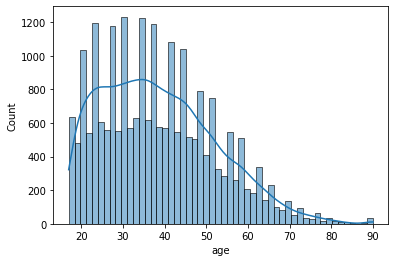

In [9]:
#Univariate Analysis: Age
sns.histplot(data=new_df['age'],kde=True); #the distribution of age is right skewed.

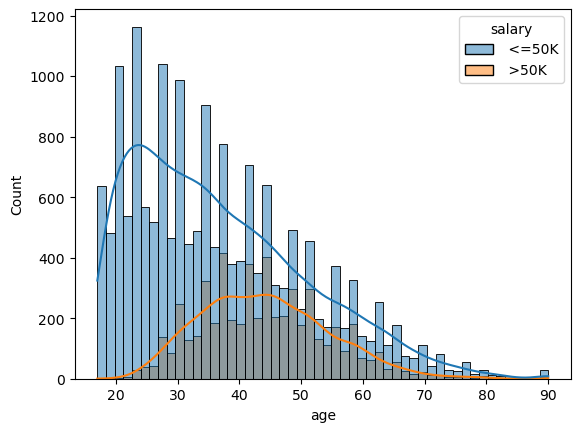

In [12]:
#Bivariate Analysis: Age and Income
sns.histplot(data=new_df,kde=True,x='age',hue='salary');

In [13]:
#percentage of adults above the age of 65
round(new_df[new_df['age'] > 65].shape[0]/new_df.shape[0] * 100,2)

3.61

In [14]:
new_df['age'].value_counts().iloc[:5]
#The dataset contains the most people between the ages of 31 to 36.

23    632
33    629
37    624
31    624
36    619
Name: age, dtype: int64

In [15]:
df.head()

,age,work-class,work-fnl,education,education-num,marital_status,position,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


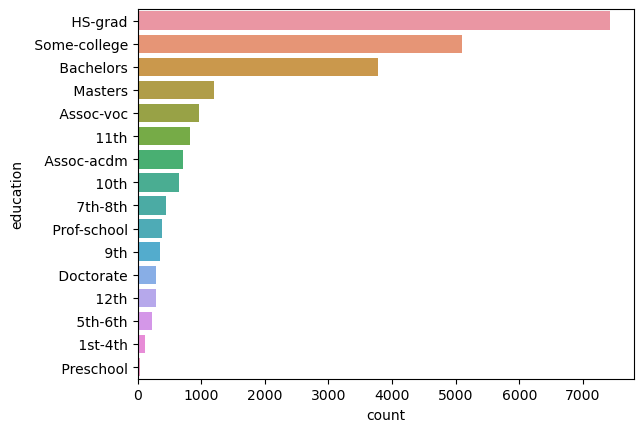

In [17]:
#Univariate Analysis: Education
sns.countplot(data=new_df,y='education',order = new_df['education'].value_counts().index);

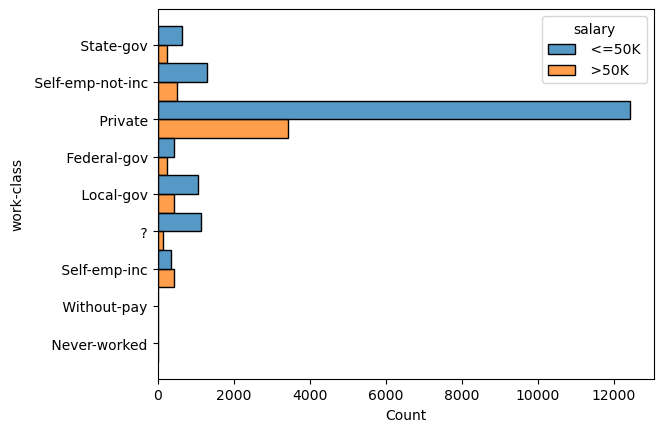

In [18]:
#Bivariate Analysis: Workclass and Income
sns.histplot(data=new_df,y='work-class',hue='salary',multiple="dodge");

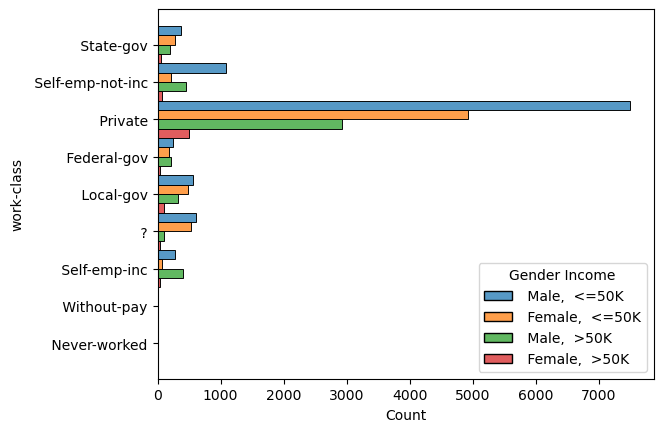

In [19]:
#Multivariate Analysis: Workclass, Gender and Income
hue = new_df[['sex', 'salary']].apply(lambda row: f"{row.sex}, {row.salary}", axis=1)
hue.name = 'Gender Income'
sns.histplot(data=new_df,y='work-class', hue=hue,multiple="dodge");

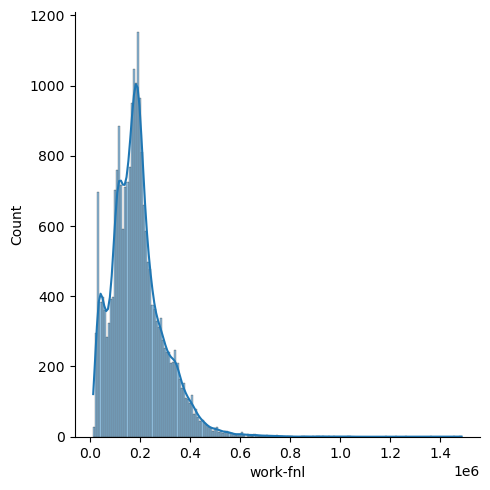

In [20]:
#Univariate Analysis: final_weight
sns.displot(data=new_df,kde=True,x='work-fnl');

In [21]:
new_df['work-fnl'].value_counts().iloc[:5]

190290    10
164190    10
203488    10
155659     9
186934     9
Name: work-fnl, dtype: int64

In [22]:
new_df[new_df['work-fnl'] == 203488][:5]

,age,work-class,work-fnl,education,education-num,marital_status,position,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
3464,31,Private,203488,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,7298,0,50,United-States,>50K
9023,30,Private,203488,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
10383,33,Private,203488,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40,United-States,<=50K
10766,34,Private,203488,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
17553,30,Private,203488,Some-college,10,Never-married,Craft-repair,Not-in-family,White,Male,0,0,44,United-States,<=50K


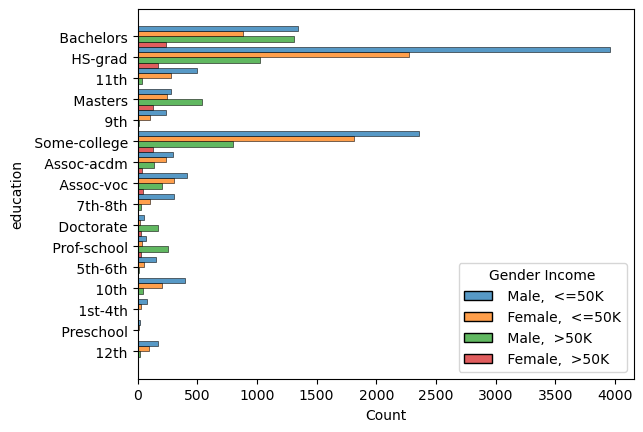

In [23]:
#Multivariate Analysis: Education, Gender and Income
hue = new_df[['sex', 'salary']].apply(lambda row: f"{row.sex}, {row.salary}", axis=1)
hue.name = 'Gender Income'
sns.histplot(data=new_df,y='education', hue=hue,multiple="dodge");

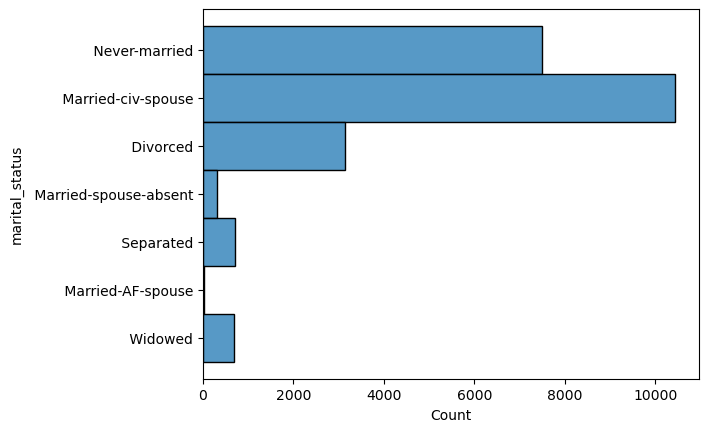

In [24]:
#Univariate Analysis: Marital Status
sns.histplot(data=new_df,y='marital_status');

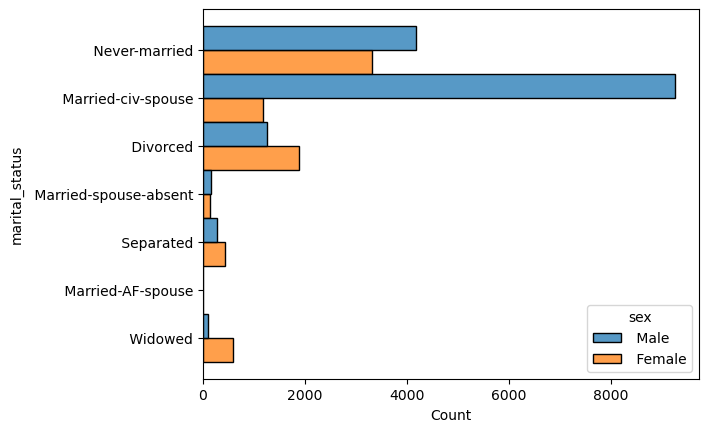

In [27]:
#Bivariate Analysis: Marital Status and Gender
sns.histplot(data=new_df,y='marital_status',hue='sex',multiple="dodge");

In [ ]:
#Bivariate Analysis: Marital Status and Income
sns.histplot(data=new_df,y='marital-status',hue='salary',multiple="dodge");

In [ ]:
#Multivariate Analysis: Marital Status, Gender and Income
hue = new_aip_df[['gender', 'income']].apply(lambda row: f"{row.gender}, {row.income}", axis=1)
hue.name = 'Gender Income'
sns.histplot(data=new_aip_df,y='marital_status', hue=hue,multiple="dodge");

In [ ]:
#Univariate Analysis: Occupation
sns.histplot(data=new_aip_df,y="occupation");

In [ ]:
#Bivariate Analysis: Occupation and Gender
sns.histplot(data=new_aip_df,y="occupation",hue='gender',multiple="dodge");

In [ ]:
#Multivariate Analysis: Occupation, Gender and Income
hue = new_aip_df[['gender', 'income']].apply(lambda row: f"{row.gender}, {row.income}", axis=1)
hue.name = 'Gender Income'
sns.histplot(data=new_aip_df,y='occupation', hue=hue,multiple="dodge");

In [ ]:
#Univariate Analysis: Realtionship
sns.histplot(data=new_aip_df,y="relationship");

In [ ]:
#Bivariate Analysis: Realtionship and Gender
sns.histplot(data=new_aip_df,y="relationship",hue="gender",multiple="dodge");

In [ ]:
#Univariate Analysis: Race
sns.histplot(data=new_aip_df,x="race");

In [ ]:
#Bivariate Analysis: Race and Gender
sns.histplot(data=new_aip_df,x="race",hue="gender",multiple="dodge");

In [ ]:
#Bivariate Analysis: Race and Occupation
sns.histplot(data=new_aip_df,x="race",hue="occupation",multiple='dodge');

In [ ]:
#Multivariate Analysis: Race, Gender and Income
hue = new_aip_df[['gender', 'income']].apply(lambda row: f"{row.gender}, {row.income}", axis=1)
hue.name = 'Gender Income'
sns.histplot(data=new_aip_df,x='race', hue=hue,multiple="dodge");

In [ ]:
#Univariate Analysis: Gender
sns.histplot(data=new_aip_df,x='gender');

In [ ]:
#Bivariate Analysis: Gender and Income
sns.histplot(data=new_aip_df,x='gender',hue='income',multiple='dodge');

In [ ]:
#Univariate Analysis: Capital Gain
sns.histplot(data=new_aip_df,x='capital_gain',kde=True);

In [ ]:
#Univariate Analysis: Capital Loss
sns.histplot(data=new_aip_df,x='capital_loss',kde=True);

In [ ]:
#Univariate Analysis: Hours per Week
sns.histplot(data=new_aip_df,x='hours_per_week',kde=True);

In [ ]:
#Univariate Analysis: Native country
plt.figure(figsize=(8,10))
sns.histplot(data=new_aip_df,y='native_country');

In [31]:
df.columns

Index(['age', 'work-class', 'work-fnl', 'education', 'education-num',
       'marital_status', 'position', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary'],
      dtype='object')

In [10]:
#label_encoding
from sklearn.preprocessing import LabelEncoder
def label_encoding():
    """
    converting categoricaL values in number by using label encoder
    """
    categoricaL_list = ['work-class','education','marital_status','position','relationship','race','sex','native_country','salary']
    label = LabelEncoder()
    for col in categoricaL_list:
        new_df[col] = label.fit_transform(new_df[col])

label_encoding()

In [11]:
new_df.head()

,age,work-class,work-fnl,education,education-num,marital_status,position,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


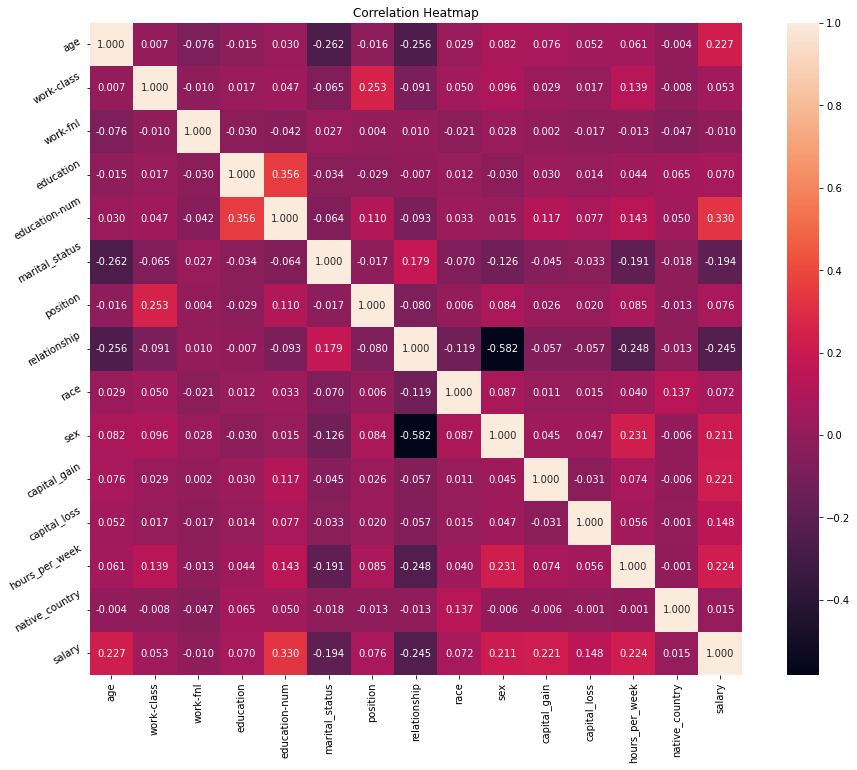

In [12]:
#creating correlation matrix
corr = new_df.corr()

#plotting the correlation matrix
plt.figure(figsize=(16,12))
ax = sns.heatmap(corr, annot=True, square=True, fmt='.3f', linecolor='black')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)
plt.title('Correlation Heatmap')
plt.show();

In [35]:
corr['salary'].sort_values(ascending=False)

salary            1.000000
education-num     0.329956
age               0.227398
hours_per_week    0.224161
capital_gain      0.220680
sex               0.211418
capital_loss      0.147719
position          0.075807
race              0.072436
education         0.070369
work-class        0.052552
native_country    0.014570
work-fnl         -0.009500
marital_status   -0.194366
relationship     -0.245430
Name: salary, dtype: float64

In [13]:
#removing final_weight feature
new_df.drop('work-fnl',axis=1,inplace=True)

In [37]:
new_df.columns

Index(['age', 'work-class', 'education', 'education-num', 'marital_status',
       'position', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'salary'],
      dtype='object')

## 4. Modeling and Evaluation

- XGBoost Classifier is the best algorithm for this problem, and I achieved the highest **training and test accuracy of 88.50% and 87.05%**, respectively. 

- The machine learning algorithm's accuracy with the best hyperparameter is:


| <center> Algorithm </center>|<center> Training Accuracy(%) </center>|<center> Test Accuracy(%) </center>|
| -----------| ----------- | ----------- |
| <center><strong>Logistic Regression</strong></center>| <center>82.00</center>|<center>82.06</center>|
| <center><strong>Decision Tree</strong></center>| <center>86.20</center>|<center>85.33</center>|
| <center><strong>K-Nearest Neighbor</strong></center>| <center>84.79</center>|<center>83.51</center>|
| <center><strong>Support Vector Machine</strong></center>| <center>86.04</center>|<center>85.03</center>|
| <center><strong>Random Forest </strong></center>| <center>97.50</center>|<center>84.80</center>|
| <center><strong>XGBoost</strong></center>| <center>88.50</center>|<center>87.05</center>|

In [14]:
#Classification Problem (Binary classification)
#importing required python libraries

#Modeling: classification algo
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#splitting the data
from sklearn.model_selection import train_test_split

#Evaluation (Nothing is mentioned in Problem. So, I'm going to use accuracy score)
from sklearn.metrics import accuracy_score

#standardization
from sklearn.preprocessing import StandardScaler

#Cross Validation
from sklearn.model_selection import cross_val_score

#Random Search for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [15]:
def Section_Three(df):
    """
    Standardization + CV{5}
    """
    features = df.iloc[:,:-1]
    target = df.iloc[:,-1]
    
    # Feature Scaling
    sc = StandardScaler()
    standard_features = sc.fit_transform(features)
    
    models = [LogisticRegression(), DecisionTreeClassifier(), KNeighborsClassifier(), SVC(), \
              RandomForestClassifier()]
    model_df = []
    
    for model in models:
        cross_validation_classifier = cross_val_score(model, standard_features, target, cv=5, scoring='accuracy')
        accuracy = round((cross_validation_classifier.mean())*100,2)
        model_df.append({"Model":model,"Accuracy": accuracy})
        
    model_df = pd.DataFrame(model_df,columns=["Model", "Accuracy"])
    
    return model_df

In [16]:
Section_Three(new_df)

,Model,Accuracy
0,LogisticRegression(),82.41
1,DecisionTreeClassifier(),81.32
2,KNeighborsClassifier(),82.94
3,SVC(),84.56
4,RandomForestClassifier(),84.79


In [17]:
def Section_Four(df):
    """
    Selection of Hyperparameter
    """
    features = df.iloc[:,:-1]
    target = df.iloc[:,-1]
    
    # Feature Scaling
    sc = StandardScaler()
    standard_features = sc.fit_transform(features)

    model_df = []

    models = {
        "Logistic Regression":{
            "model": LogisticRegression(max_iter=1000,multi_class='auto'), 
            "parameters":{
                "solver":['newton-cg', 'lbfgs'], 
                "C":[100, 10, 1.0, 0.1, 0.01], 
                "penalty": ['none','l2', 'elasticnet']
            }},
        "Decision Tree Classifier":{ 
            "model":DecisionTreeClassifier(splitter='best'), 
            "parameters":{ 
                'criterion': ['gini', 'entropy'],
                'max_depth': [1, 5, 10]
            }},
        "K-Nearest Neighbors":{
            "model": KNeighborsClassifier(),
            "parameters": {
                'n_neighbors':range(1, 21, 2),
                'weights':['uniform', 'distance'],
                'metric':['euclidean', 'manhattan', 'minkowski']
             }},
        "Support Vector Machine":{
            "model":SVC(gamma='scale'),
            "parameters": {
                'kernel':['poly', 'rbf', 'sigmoid'],
                'C':[50, 10, 1.0, 0.1, 0.01]
            }},
        "Random Forest":{
            "model":RandomForestClassifier(criterion='gini'),
            "parameters":{
                'n_estimators':[10,100,1000],
                'max_features':['sqrt', 'log2']
            }}}

    for model_name, model_params in models.items():
        rs_cv = GridSearchCV(model_params['model'], model_params['parameters'], cv = 5, return_train_score=False)
        rs_cv.fit(standard_features, target)
        model_df.append(
        {
            'model': model_name,
            'best_parameters': rs_cv.best_params_,
            'score': rs_cv.best_score_
        })

    return pd.DataFrame(model_df, columns=['model','best_parameters','score'])

In [18]:
import time 
import warnings
warnings.filterwarnings('ignore')

begin = time.time()
hyper_parameter = Section_Four(new_df)
end = time.time()

In [19]:
(end-begin)/3600

0.6472714889711804

In [20]:
hyper_parameter

,model,best_parameters,score
0,Logistic Regression,"{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-...",0.824061
1,Decision Tree Classifier,"{'criterion': 'entropy', 'max_depth': 10}",0.854291
2,K-Nearest Neighbors,"{'metric': 'manhattan', 'n_neighbors': 19, 'we...",0.838584
3,Support Vector Machine,"{'C': 1.0, 'kernel': 'rbf'}",0.845560
4,Random Forest,"{'max_features': 'log2', 'n_estimators': 1000}",0.848104


In [21]:
hyper_parameter['best_parameters'].to_dict()

{0: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'},
 1: {'criterion': 'entropy', 'max_depth': 10},
 2: {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'},
 3: {'C': 1.0, 'kernel': 'rbf'},
 4: {'max_features': 'log2', 'n_estimators': 1000}}

In [22]:
def final_model(df):
    """
    By applying the best hyperparameter to the algorithms based on the problem, 
    the final model is used to determine the accuracy of the test and training datasets.
    """
    features = df.iloc[:,:-1]
    target = df.iloc[:,-1]
    
    sc = StandardScaler()
    standard_features = sc.fit_transform(features)

    X_train, X_test, y_train, y_test = train_test_split(standard_features,target,
                                                test_size=0.3,stratify=target, random_state=42)
    
    models = [
        LogisticRegression(solver='newton-cg', penalty='none', C= 100), 
        DecisionTreeClassifier(max_depth=10, criterion='gini'), 
        KNeighborsClassifier(weights='uniform', n_neighbors=19, metric='minkowski'),
        SVC(kernel='rbf', C=10), 
        RandomForestClassifier(n_estimators=1000, max_features='sqrt')
    ]
    
    model_df = []
    
    for model in models:
        classifier = model
        model.fit(X_train,y_train)
        training_predict = model.predict(X_train)
        training_score = round(accuracy_score(training_predict,y_train)*100,2)
        test_predict = model.predict(X_test)
        test_score = round(accuracy_score(test_predict,y_test)*100,2)
        model_df.append({"Model":classifier, 
                         "Accuracy on Training": training_score, 
                         "Accuracy on Testing":test_score})
    
    model_df = pd.DataFrame(model_df,columns=["Model", "Accuracy on Training", 
                                              "Accuracy on Testing"])
    
    return model_df

In [23]:
import inspect
x = final_model(new_df)
inspect.getmembers(x["Model"].to_dict()[4])

[('__abstractmethods__', frozenset()),
 ('__annotations__', {'_required_parameters': typing.List[str]}),
 ('__class__', sklearn.ensemble._forest.RandomForestClassifier),
 ('__delattr__',
  <method-wrapper '__delattr__' of RandomForestClassifier object at 0x000002067BAB5D60>),
 ('__dict__',
  {'base_estimator': DecisionTreeClassifier(),
   'n_estimators': 1000,
   'estimator_params': ('criterion',
    'max_depth',
    'min_samples_split',
    'min_samples_leaf',
    'min_weight_fraction_leaf',
    'max_features',
    'max_leaf_nodes',
    'min_impurity_decrease',
    'random_state',
    'ccp_alpha'),
   'bootstrap': True,
   'oob_score': False,
   'n_jobs': None,
   'random_state': None,
   'verbose': 0,
   'warm_start': False,
   'class_weight': None,
   'max_samples': None,
   'criterion': 'gini',
   'max_depth': None,
   'min_samples_split': 2,
   'min_samples_leaf': 1,
   'min_weight_fraction_leaf': 0.0,
   'max_features': 'sqrt',
   'max_leaf_nodes': None,
   'min_impurity_decrease

In [66]:
import pickle 
def save_model(df):
    """
    function to save the model
    """
    features = df.iloc[:,:-1]
    target = df.iloc[:,-1]
    
    sc = StandardScaler()
    standard_features = sc.fit_transform(features)

    X_train, X_test, y_train, y_test = train_test_split(standard_features,target,
                                                test_size=0.3,stratify=target, random_state=42)
    
    model = RandomForestClassifier(n_estimators =  1000, max_features = 'sqrt')

    model.fit(X_train,y_train)
    
    file = open('model.pkl', 'wb')
    pickle.dump(model, file)
    
    return "Model Saved in model.pkl file."

save_model(new_df)

'Model Saved in model.pkl file.'